**Phys 129L Section 8A** <br>
2/25/25

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pickle

# Task 1: 2D Classical Ising Model with MCMC

2D Lattice generation and Ising Hamiltonian

In [2]:
def initialize_spins(N):
    """
    Initializes an N x N lattice with random spin configuration (-1 or 1).

    Parameters:
        N (int): The size of the lattice.

    Returns:
        np.ndarray: An NxN array with values -1 or 1.
    """
    return np.random.choice([-1, 1], size=(N, N))

# Example usage
N = 10  # Define lattice size
spins = initialize_spins(N)
print(spins)

[[ 1 -1  1  1 -1 -1 -1  1  1  1]
 [-1  1 -1 -1 -1  1  1  1  1 -1]
 [ 1 -1 -1 -1  1 -1 -1 -1  1 -1]
 [-1  1 -1 -1  1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1  1 -1]
 [ 1  1 -1  1  1 -1  1  1  1  1]
 [ 1 -1 -1 -1 -1  1  1  1 -1  1]
 [-1  1 -1  1 -1  1 -1  1 -1  1]
 [-1 -1  1 -1 -1 -1 -1  1 -1  1]
 [ 1 -1 -1  1 -1  1  1 -1  1  1]]


Statistical Description of the Ising Model

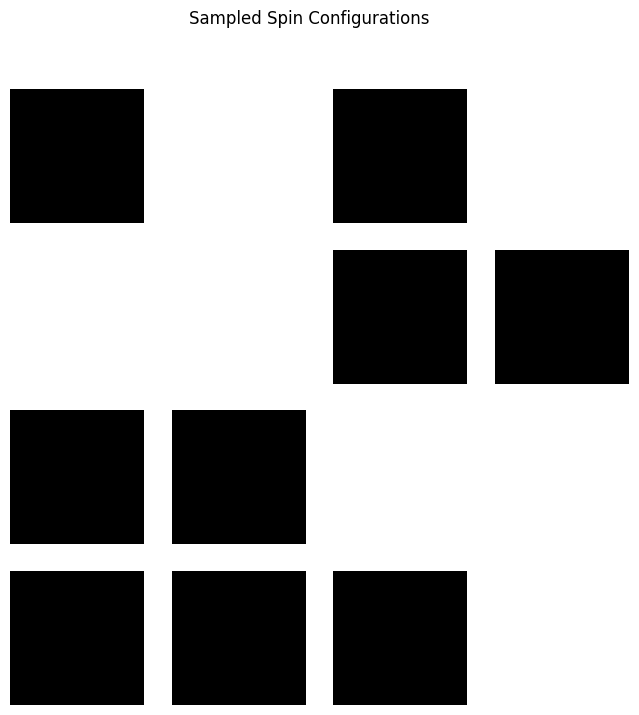

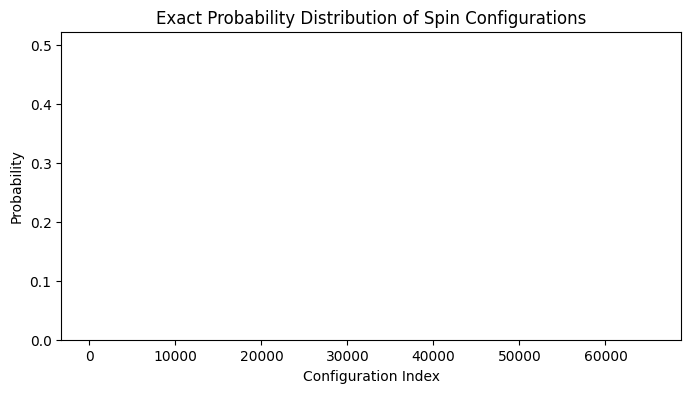

In [4]:
# Define parameters
L = 4  # Lattice size
J = 1  # Interaction strength
B = 0  # External field
T = 1  # Temperature
beta = 1 / T

# Function to compute energy of a spin configuration
def compute_energy(spin_config):
    energy = 0
    for i in range(L):
        for j in range(L):
            S_ij = spin_config[i, j]
            # Nearest neighbors (periodic boundary conditions)
            S_right = spin_config[i, (j + 1) % L]  # Right neighbor
            S_down = spin_config[(i + 1) % L, j]  # Bottom neighbor
            energy -= J * S_ij * (S_right + S_down)  # Interaction energy
    return energy

# Generate all possible spin configurations
all_configs = list(itertools.product([-1, 1], repeat=L * L))
energies = np.array([compute_energy(np.array(config).reshape(L, L)) for config in all_configs])

# Compute partition function Z
boltzmann_weights = np.exp(-beta * energies)
Z = np.sum(boltzmann_weights)

# Compute probabilities
probabilities = boltzmann_weights / Z

# Sample configurations based on computed PMF
num_samples = 16
sampled_indices = np.random.choice(len(all_configs), size=num_samples, p=probabilities)
sampled_configs = [np.array(all_configs[i]).reshape(L, L) for i in sampled_indices]

# Plot sampled configurations
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for ax, config in zip(axes.flatten(), sampled_configs):
    ax.imshow(config, cmap="gray", vmin=-1, vmax=1)
    ax.axis("off")
plt.suptitle("Sampled Spin Configurations")
plt.show()

# Plot probability mass function
plt.figure(figsize=(8, 4))
plt.bar(range(len(probabilities)), probabilities, color="blue", alpha=0.7)
plt.xlabel("Configuration Index")
plt.ylabel("Probability")
plt.title("Exact Probability Distribution of Spin Configurations")
plt.show()

Gibbs Sampler on Ising Model

The total conditional distribution function for a single spin \( S_i \) given the rest of the spins follows from the joint probability distribution of the Ising model:

$$
P(S) = \frac{1}{Z} e^{-\beta H}
$$

To find the conditional probability \( P(S_i | S_{\neq i}) \), we express it as:

$$
P(S_i | S_{\neq i}) = \frac{P(S)}{P(S_{\neq i})}
$$

Since the Ising Hamiltonian is:

$$
H = -J \sum_{\langle i,j \rangle} S_i S_j - B \sum_{i} S_i
$$

the energy contribution of a single spin $ S_i $ depends only on its nearest neighbors. The conditional probability is:

$$
P(S_i | S_{\neq i}) = \frac{e^{\beta J S_i \sum_{\langle i,j \rangle} S_j + \beta B S_i}}{e^{\beta J (+1) \sum_{\langle i,j \rangle} S_j + \beta B} + e^{\beta J (-1) \sum_{\langle i,j \rangle} S_j - \beta B}}
$$

Simplifying, we get:

$$
P(S_i = 1 | S_{\neq i}) = \frac{1}{1 + e^{-2\beta (J \sum_{\langle i,j \rangle} S_j + B)}}
$$

$$
P(S_i = -1 | S_{\neq i}) = \frac{1}{1 + e^{2\beta (J \sum_{\langle i,j \rangle} S_j + B)}}
$$

This is a **local update rule** used in Gibbs sampling and Metropolis-Hastings methods for simulating the Ising model efficiently when exact enumeration is infeasible.


Gibbs Iteration


Burn-in 10: First sampled spin configuration
[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]

Burn-in 100: First sampled spin configuration
[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]

Burn-in 1000: First sampled spin configuration
[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]

Burn-in 10: Mean spin values
[[0.4995992 0.5       0.5001002 0.499499 ]
 [0.4997996 0.4993988 0.4997996 0.4997996]
 [0.4992986 0.4997996 0.4990982 0.499499 ]
 [0.4995992 0.4998998 0.4997996 0.5      ]]

Burn-in 100: Mean spin values
[[0.49959184 0.5        0.50010204 0.49938776]
 [0.49979592 0.49938776 0.49979592 0.49979592]
 [0.49928571 0.49979592 0.49908163 0.4994898 ]
 [0.49959184 0.49989796 0.49979592 0.5       ]]

Burn-in 1000: Mean spin values
[[0.4995   0.5      0.50025  0.499375]
 [0.499875 0.499375 0.499875 0.4995  ]
 [0.49925  0.49975  0.498875 0.499625]
 [0.499875 0.49975  0.499875 0.49975 ]]


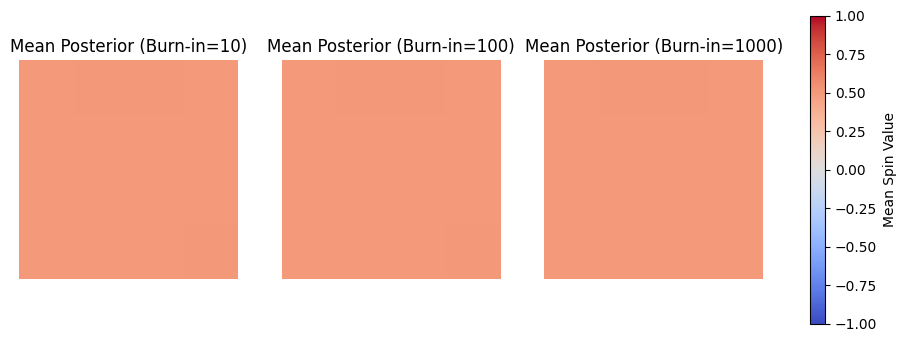

In [ ]:
# Define parameters
L = 4  # Lattice size
J = 1  # Interaction strength
B = 0  # External field
T = 1  # Temperature
beta = 1 / T
num_iterations = 5000  # Total Gibbs sampling iterations
burn_in_periods = [10, 100, 1000]  # Different burn-in periods for visualization
num_chains = 4  # Number of parallel chains

# Function to compute energy of a given spin configuration
def compute_energy(spins):
    """Compute the energy of the spin configuration."""
    energy = 0
    for i in range(L):
        for j in range(L):
            neighbors_sum = (
                spins[(i + 1) % L, j] + spins[(i - 1) % L, j] + 
                spins[i, (j + 1) % L] + spins[i, (j - 1) % L]
            )
            energy += -J * spins[i, j] * neighbors_sum  # Interaction energy
    return energy / 2  # Each pair counted twice

# Function to perform Gibbs sampling
def gibbs_sampling(initial_spins, num_iterations, burn_in_periods):
    spins = initial_spins.copy()
    burn_in_samples = {burn: [] for burn in burn_in_periods}
    
    for iteration in range(num_iterations):
        for i in range(L):
            for j in range(L):
                # Compute the change in energy if we flip this spin
                neighbors_sum = (
                    spins[(i + 1) % L, j] + spins[(i - 1) % L, j] + 
                    spins[i, (j + 1) % L] + spins[i, (j - 1) % L]
                )
                dE = 2 * J * spins[i, j] * neighbors_sum  # Energy change on flipping
                
                # Metropolis update
                if dE <= 0 or np.random.rand() < np.exp(-beta * dE):
                    spins[i, j] *= -1  # Flip spin
                
        # Store spin configurations after specific burn-in periods
        for burn in burn_in_periods:
            if iteration >= burn:
                burn_in_samples[burn].append(spins.copy())
    
    return burn_in_samples

# Initialize multiple random spin configurations
chains = [np.random.choice([-1, 1], size=(L, L)) for _ in range(num_chains)]

# Run Gibbs sampling for each chain and collect spin configurations at different burn-in periods
posterior_samples = {burn: [] for burn in burn_in_periods}
for chain in chains:
    samples = gibbs_sampling(chain, num_iterations, burn_in_periods)
    for burn in burn_in_periods:
        posterior_samples[burn].extend(samples[burn])  # Store multiple samples

# Debugging: Print some individual samples before averaging
for burn in burn_in_periods:
    print(f"\nBurn-in {burn}: First sampled spin configuration")
    print(posterior_samples[burn][0])  # Print first sample matrix

# Compute average spin configuration for each burn-in period
mean_posteriors = {burn: np.mean(posterior_samples[burn], axis=0) for burn in burn_in_periods}

# Debugging print: Check mean spin values
for burn in burn_in_periods:
    print(f"\nBurn-in {burn}: Mean spin values")
    print(mean_posteriors[burn])

# Plot posterior statistics
fig, axes = plt.subplots(1, len(burn_in_periods), figsize=(12, 4))
for ax, (burn, mean_config) in zip(axes, mean_posteriors.items()):
    im = ax.imshow(mean_config, cmap="coolwarm", vmin=-1, vmax=1)
    ax.set_title(f"Mean Posterior (Burn-in={burn})")
    ax.axis("off")

# Add colorbar
fig.colorbar(im, ax=axes.ravel().tolist(), orientation="vertical", label="Mean Spin Value")
plt.show()

Magnetization, Landau Theory, and Phase Transition of the Ising Model

Magnetization at different temperatures

KeyboardInterrupt: 

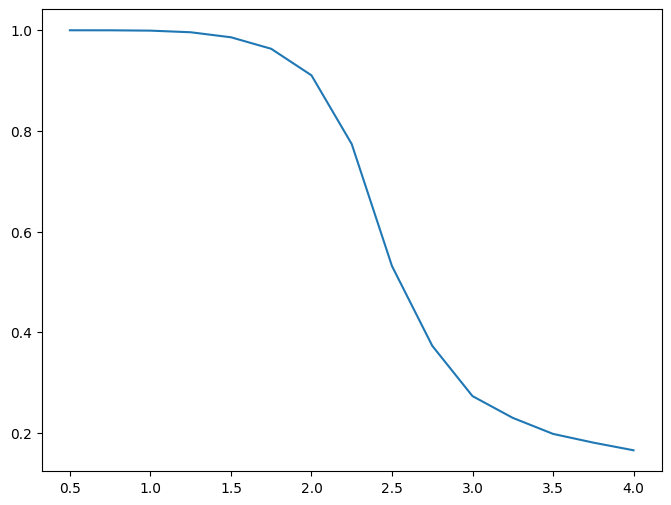

In [17]:
# Define parameters
lattice_sizes = [10, 17, 25, 32, 40]  # Different lattice sizes
J = 1  # Interaction strength
B = 0  # External field
num_iterations = 5000  # Total Gibbs sampling iterations
burn_in = 2000  # Burn-in period
temps = np.linspace(0.5, 4.0, 15)  # Temperature range
num_chains = 4  # Parallel chains

# Function to compute magnetization
def magnetization(spins):
    return np.abs(np.mean(spins))

# Function to perform Gibbs sampling
def gibbs_sampling(L, T):
    beta = 1 / T
    spins = np.random.choice([-1, 1], size=(L, L))  # Initialize randomly
    M_vals = []

    for iteration in range(num_iterations):
        for i in range(L):
            for j in range(L):
                # Compute sum of neighboring spins
                neighbors_sum = (
                    spins[(i + 1) % L, j] + spins[(i - 1) % L, j] +
                    spins[i, (j + 1) % L] + spins[i, (j - 1) % L]
                )
                dE = 2 * J * spins[i, j] * neighbors_sum  # Energy change

                # Metropolis update
                if dE <= 0 or np.random.rand() < np.exp(-beta * dE):
                    spins[i, j] *= -1  # Flip spin

        # Store magnetization after burn-in
        if iteration >= burn_in:
            M_vals.append(magnetization(spins))

    return np.mean(M_vals)  # Average magnetization after burn-in

# Run simulations for different lattice sizes
plt.figure(figsize=(8, 6))
for L in lattice_sizes:
    M_vals = [np.mean([gibbs_sampling(L, T) for _ in range(num_chains)]) for T in temps]
    plt.plot(temps, M_vals, label=f"L = {L}")

# Plot settings
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization per spin (M)")
plt.title("Ferromagnetic to Paramagnetic Transition")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Parameters
J = 1  # Interaction strength
B = 0  # External field
num_iterations = 5000  # Total Gibbs sampling iterations
burn_in = 2000  # Burn-in period
temps = np.linspace(1.0, 8.0, 20)  # Temperature range
num_chains = 4  # Parallel chains
# lattice_sizes = [10, 17, 25, 32, 40]  # Different L values
lattice_sizes = [25, 32, 40]  # Different L values

# Function to compute magnetization
def magnetization(spins):
    return np.abs(np.mean(spins))

# Function to perform Gibbs sampling for a given L and T
def gibbs_sampling(L, T):
    beta = 1 / T
    spins = np.random.choice([-1, 1], size=(L, L))  # Random init
    M_vals = []

    for iteration in range(num_iterations):
        for i in range(L):
            for j in range(L):
                # Compute sum of neighboring spins
                neighbors_sum = (
                    spins[(i + 1) % L, j] + spins[(i - 1) % L, j] +
                    spins[i, (j + 1) % L] + spins[i, (j - 1) % L]
                )
                dE = 2 * J * spins[i, j] * neighbors_sum  # Energy change

                # Metropolis update
                if dE <= 0 or np.random.rand() < np.exp(-beta * dE):
                    spins[i, j] *= -1  # Flip spin

        # Store magnetization after burn-in
        if iteration >= burn_in:
            M_vals.append(magnetization(spins))

    return np.mean(M_vals)  # Average magnetization after burn-in

In [30]:
# Dictionary to store results
results = {}

for L in lattice_sizes:
    M_vals = []
    for T in temps:
        avg_M = np.mean([gibbs_sampling(L, T) for _ in range(num_chains)])
        M_vals.append(avg_M)
        print(f"Done: L={L}, T={T:.2f}, M={avg_M:.4f}")
    
    results[L] = M_vals  # Store results for this L

# Save results to a file (optional)
with open("ising_results.pkl", "wb") as f:
    pickle.dump(results, f)
print("Simulation complete. Results saved.")

Done: L=25, T=1.00, M=0.9993
Done: L=25, T=1.37, M=0.9926
Done: L=25, T=1.74, M=0.9658
Done: L=25, T=2.11, M=0.8679
Done: L=25, T=2.47, M=0.2901
Done: L=25, T=2.84, M=0.1259
Done: L=25, T=3.21, M=0.0928
Done: L=25, T=3.58, M=0.0763
Done: L=25, T=3.95, M=0.0670
Done: L=25, T=4.32, M=0.0617
Done: L=25, T=4.68, M=0.0565
Done: L=25, T=5.05, M=0.0543
Done: L=25, T=5.42, M=0.0515
Done: L=25, T=5.79, M=0.0490
Done: L=25, T=6.16, M=0.0476
Done: L=25, T=6.53, M=0.0458
Done: L=25, T=6.89, M=0.0447
Done: L=25, T=7.26, M=0.0440
Done: L=25, T=7.63, M=0.0430
Done: L=25, T=8.00, M=0.0433
Done: L=32, T=1.00, M=0.9993
Done: L=32, T=1.37, M=0.9925
Done: L=32, T=1.74, M=0.9657
Done: L=32, T=2.11, M=0.8624
Done: L=32, T=2.47, M=0.2370
Done: L=32, T=2.84, M=0.1004
Done: L=32, T=3.21, M=0.0727
Done: L=32, T=3.58, M=0.0600
Done: L=32, T=3.95, M=0.0521
Done: L=32, T=4.32, M=0.0475
Done: L=32, T=4.68, M=0.0446
Done: L=32, T=5.05, M=0.0421
Done: L=32, T=5.42, M=0.0403
Done: L=32, T=5.79, M=0.0383
Done: L=32, T=

In [31]:
# Save the current results to avoid losing progress
with open("ising_results.pkl", "wb") as f:
    pickle.dump(results, f)

print("Partial results saved! Now you can proceed with plotting.")

Partial results saved! Now you can proceed with plotting.


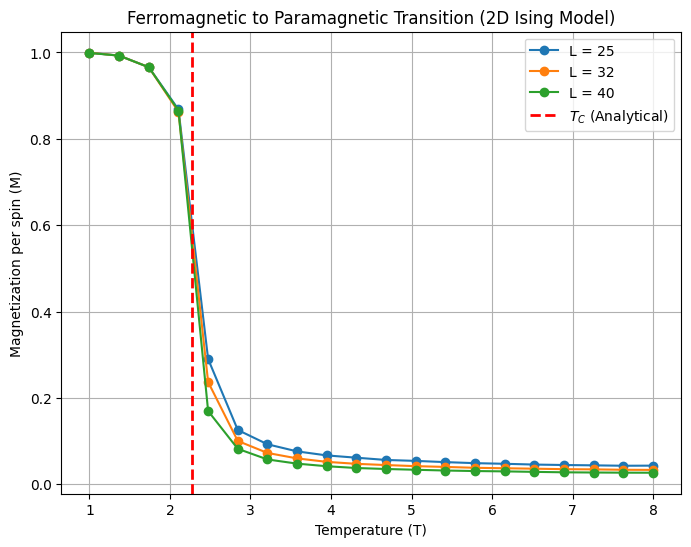

In [32]:
plt.figure(figsize=(8, 6))
for L in results.keys():  # Only use existing results
    plt.plot(temps, results[L], label=f"L = {L}", marker='o')

# Compute and plot the critical temperature
Tc = 2 / np.log(1 + np.sqrt(2))  # ≈ 2.269
plt.axvline(Tc, color='red', linestyle='dashed', linewidth=2, label=r"$T_C$ (Analytical)")

plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization per spin (M)")
plt.title("Ferromagnetic to Paramagnetic Transition (2D Ising Model)")
plt.legend()
plt.grid(True)
plt.show()

$$T_C = \frac{2J}{\log{(1+\sqrt{2})}}$$

Classical Magnetic field dependence: magnetization of the 2D Ising model

Specific heat of the 2D Ising model

Magnetic Susceptibility of th e2D Ising model